# New York Taxi Tip Prediction

In this project, we aim to develop machine learning models to estimate two key outcomes of taxi trips in New York City:

- **`tip_amount`**: the amount of money given by the passenger to the driver as a tip.
- **`fare_amount`**: the total fare charged for the taxi ride.

### Importing Libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

### Importing Datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("taxi-train.csv")
test_data = pd.read_csv("taxi-test.csv")

In [7]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/taxi-train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/taxi-test.csv")

In [ ]:
train.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'rate_code',
       'passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'tip_amount', 'tip_paid'],
      dtype='object')

In [ ]:
test_data.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type
0,VTS,2009-03-19 15:13:00+00:00,2009-03-19 15:23:00+00:00,-73.988103,40.759927,-73.974167,40.753982,NaN,1,0.83,CRD
1,CMT,2009-10-26 08:38:03+00:00,2009-10-26 08:45:14+00:00,-73.975350,40.757593,-73.974171,40.764106,NaN,1,0.90,CSH
2,CMT,2015-06-12 07:15:51+00:00,2015-06-12 07:25:29+00:00,-73.957085,40.777405,-73.987869,40.764839,1.0,1,2.70,CSH
3,CMT,2012-06-08 22:01:46+00:00,2012-06-08 22:08:41+00:00,-73.976360,40.764031,-73.963705,40.774263,1.0,2,1.20,CSH
4,CMT,2009-08-10 20:10:37+00:00,2009-08-10 20:13:50+00:00,-73.988565,40.748896,-73.990490,40.756525,NaN,2,0.70,CSH


In [ ]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,fare_amount,tip_amount,tip_paid
count,1.071910e+06,1.071910e+06,1.071910e+06,1.071910e+06,898694.000000,1.071910e+06,1.071910e+06,1.071910e+06,1.071910e+06,1.071910e+06
mean,-7.397707e+01,4.075684e+01,-7.397554e+01,4.075727e+01,1.004778,1.691701e+00,1.812045e+00,8.456763e+00,7.843356e-01,4.227939e-01
std,1.437120e-02,1.819315e-02,1.573655e-02,1.885316e-02,0.157091,1.312070e+00,1.221569e+00,4.017411e+00,1.190242e+00,4.940035e-01
min,-7.400000e+01,4.070000e+01,-7.400000e+01,4.070000e+01,0.000000,1.000000e+00,1.000000e-02,2.500000e+00,0.000000e+00,0.000000e+00
25%,-7.398816e+01,4.074478e+01,-7.398730e+01,4.074532e+01,1.000000,1.000000e+00,9.500000e-01,5.700000e+00,0.000000e+00,0.000000e+00
50%,-7.397982e+01,4.075782e+01,-7.397857e+01,4.075826e+01,1.000000,1.000000e+00,1.500000e+00,7.500000e+00,0.000000e+00,0.000000e+00
75%,-7.396813e+01,4.076944e+01,-7.396649e+01,4.077046e+01,1.000000,2.000000e+00,2.300000e+00,1.010000e+01,1.500000e+00,1.000000e+00
max,-7.390001e+01,4.080000e+01,-7.390001e+01,4.080000e+01,99.000000,6.000000e+00,1.680000e+01,2.000000e+02,1.444000e+02,1.000000e+00


#### Splitting Test Data

Split into train (80%) and test (20%)

In [8]:
train, test = train_test_split(train, test_size=0.2, random_state=42)

### Exploratory Data Analysis

##### Data Overview (Train)

In [ ]:
print(train.describe())

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count     643146.000000    643146.000000      643146.000000     643146.000000   
mean         -73.977064        40.756856         -73.975528         40.757297   
std            0.014367         0.018191           0.015740          0.018837   
min          -73.999999        40.700002         -73.999999         40.700005   
25%          -73.988159        40.744815         -73.987281         40.745371   
50%          -73.979807        40.757845         -73.978560         40.758280   
75%          -73.968099        40.769448         -73.966475         40.770472   
max          -73.900035        40.799997         -73.900008         40.799999   

           rate_code  passenger_count  trip_distance    fare_amount  \
count  539351.000000    643146.000000  643146.000000  643146.000000   
mean        1.004887         1.691981       1.812969       8.460143   
std         0.178439         1.311383       1.222587     

In [ ]:
print(train.isnull().sum())

vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
rate_code            103795
passenger_count           0
trip_distance             0
payment_type              0
fare_amount               0
tip_amount                0
tip_paid                  0
dtype: int64


##### Distribution Target Variables

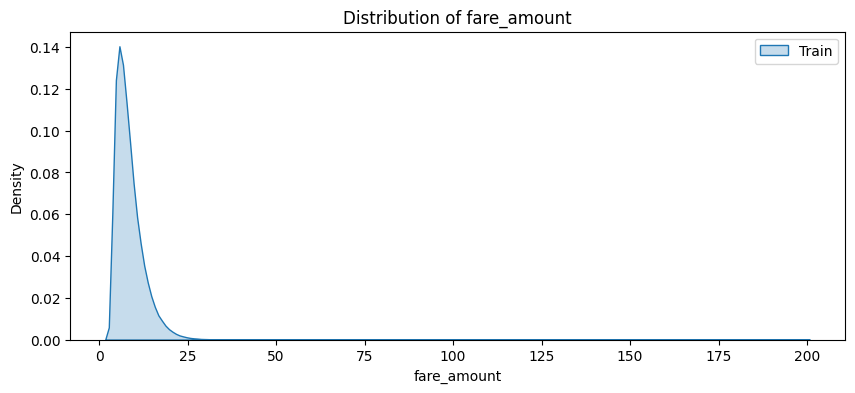

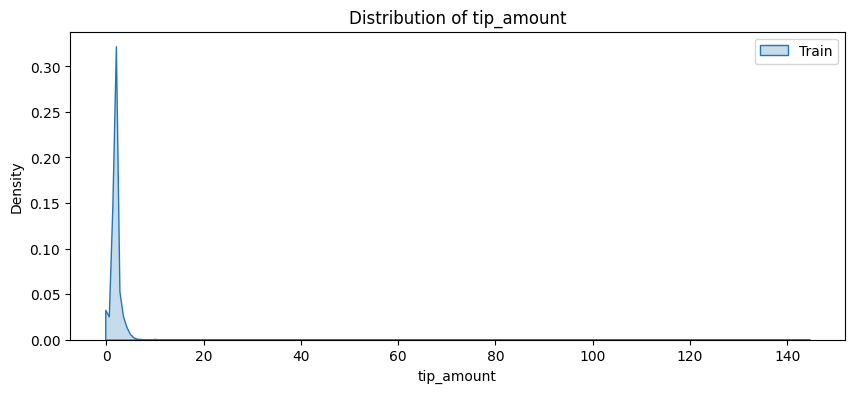

In [ ]:
for col in ['fare_amount', 'tip_amount']:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(train[col], label='Train', fill=True)
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

##### Dropping Irrelevant Variables

The `tip_paid` column is irrelevant for this task because it directly reflects whether a tip was given.
Since our goal is to predict the actual `tip_amount`, using `tip_paid` would introduce data leakage. Therefore, we will exclude it from our features.

In [ ]:
train = train.drop(columns='tip_paid')
test = test.drop(columns='tip_paid')

##### Handling Missing Values

Based on the previous EDA, missing values were found only in the `rate_code` column, with 103,795 missing entries, accounting for approximately 16.1% of the total 643,146 rows.

 Since the proportion is not too large and rate_code is a categorical feature, the missing values were imputed with a new category labeled 'Unknown'. (Combined with the handling outliers)

##### Distribution Categorical Variables

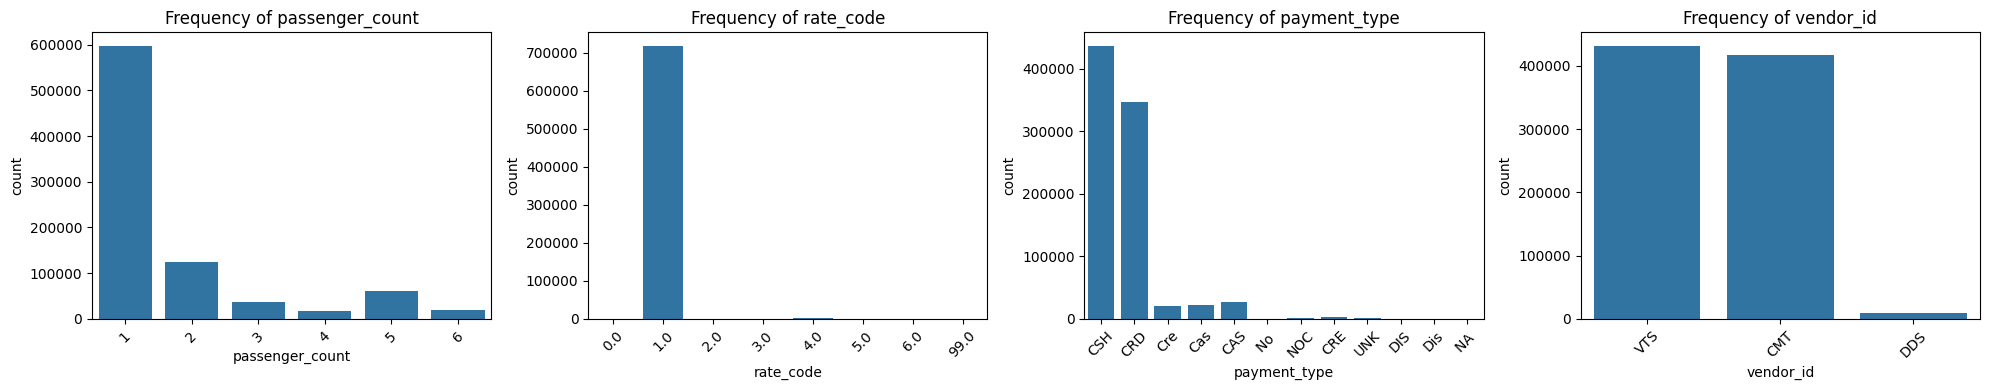

In [ ]:
categorical = ['passenger_count', 'rate_code', 'payment_type', 'vendor_id']

fig, axes = plt.subplots(1, len(categorical), figsize=(5 * len(categorical), 4))

for i, col in enumerate(categorical):
    sns.countplot(x=col, data=train, ax=axes[i])
    axes[i].set_title(f'Frequency of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

From the previous analysis and the document i quoted in the [NYC Taxi](https://www.nyc.gov/assets/tlc/downloads/pdf/taxi_information.pdf) document, we identified `rate_code` > 6 is an outlier and handled it by reassigning it to the 'Unknown' category.

##### Handling Outliers

In [ ]:
for df in [train, test, test_data]:
    df['rate_code'] = df['rate_code'].astype(str)

valid = {'1.0', '2.0', '3.0', '4.0', '5.0', '6.0'}

for df in [train, test, test_data]:
    df['rate_code'] = df['rate_code'].where(df['rate_code'].isin(valid), 'Unknown')

In [ ]:
#Filtering out rows that have pickup or dropoff coordinates outside the New York City area
for df in [train, test, test_data]:
  df[
      (df['pickup_latitude'] < 40.5) | (df['pickup_latitude'] > 41.0) |
      (df['pickup_longitude'] < -74.3) | (df['pickup_longitude'] > -73.6) |
      (df['dropoff_latitude'] < 40.5) | (df['dropoff_latitude'] > 41.0) |
      (df['dropoff_longitude'] < -74.3) | (df['dropoff_longitude'] > -73.6)
  ]

##### Distribution Numerical Variables

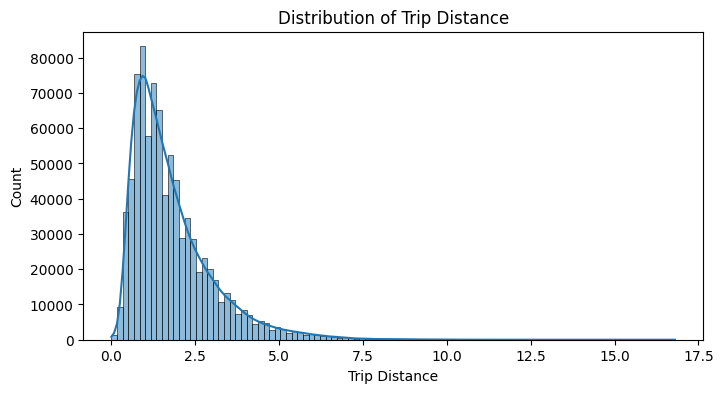

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(train['trip_distance'], bins=100, kde=True)
plt.title(f'Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel("Count")
plt.show()

### Feature Engineering

Payment Type

In [ ]:
# Merging various cash and card payment types into a single category each, and grouping the rest as 'Other'
for df in [train, test, test_data]:
    df['payment_type'] = df['payment_type'].str.upper()
    df['payment_type'] = df['payment_type'].replace({'CAS': 'CSH', 'CRE': 'CRD'})
    df['payment_type'] = df['payment_type'].where(df['payment_type'].isin(['CSH', 'CRD']), 'OTHER')

##### Time Zone Transformation

In [9]:
for df in [train, test, test_data]:
    # Convert pickup and dropoff times to timezone-aware UTC datetime
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True)
    df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], utc=True)

    # Convert UTC timestamps to US Eastern Time (automatically handles EST vs. EDT)
    df['pickup_datetime'] = df['pickup_datetime'].dt.tz_convert('US/Eastern')
    df['dropoff_datetime'] = df['dropoff_datetime'].dt.tz_convert('US/Eastern')

##### Distance & Duration of Trip

In [10]:
# Calculate trip duration in hours
for df in [train, test, test_data]:
    df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 3600.0

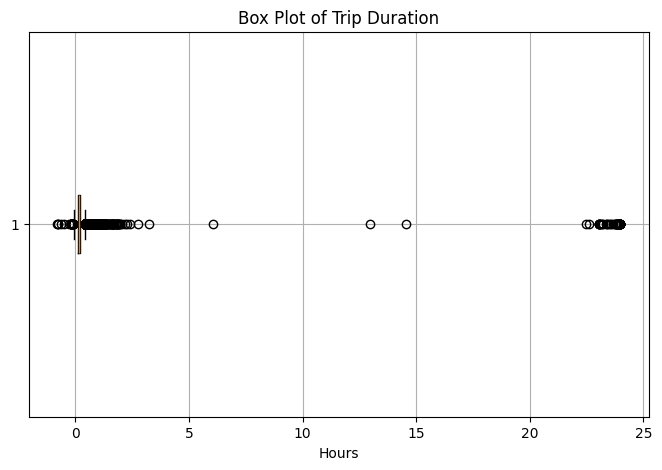

In [11]:
plt.figure(figsize=(8, 5))
plt.boxplot(train['trip_duration'], vert=False, showfliers=True)
plt.title("Box Plot of Trip Duration")
plt.xlabel("Hours")
plt.grid(True)
plt.show()

* Short trips are common in city taxi data.
* Long trips (10–24 hours) are likely anomalies

##### Pickup Hour & Day of Week

In [ ]:
for df in [train, test, test_data]:
  # Create a binary feature: 1 if pickup time is at night (8PM–6AM), else 0
  df['night_surcharge'] = df['pickup_datetime'].dt.hour.apply(lambda x: 1 if x >= 20 or x < 6 else 0)

  # Create a binary feature: 1 if pickup time is during weekday evening peak hours (4PM–7PM), else 0
  df['evening_peak_surcharge'] = (
    (df['pickup_datetime'].dt.hour.between(16, 19)) &
    (df['pickup_datetime'].dt.weekday < 5)
  ).astype(int)

In [ ]:
# Create a binary feature: 1 if pickup time is during weekend
for df in [train, test, test_data]:
    df['pickup_weekend'] = df['pickup_datetime'].dt.dayofweek.isin([5, 6]).astype(int)

##### Trip Speed & Remove Impossible Trips

In [ ]:
# Calculate speed and remove trips with unrealistic speeds
for df in [train, test, test_data]:
    df['speed'] = df['trip_distance'] / df['trip_duration']
    df.drop(df[(df['speed'] > 80) | (df['speed'] < 1)].index, inplace=True)
    df.drop(df[(df['speed'] <5) | (df['speed'] < 1)].index, inplace=True)

Impossible Trips

In [ ]:
# Remove non-positive duration with distance, and trips over 24 hours
for df in [train, test, test_data]:
    df.drop(df[(df['trip_duration'] <=0) & (df['trip_distance'] > 0)].index, inplace=True)
    df.drop(df[df['trip_duration'] > 24].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

##### One Hot Encoding

In [ ]:
categorical_cols = ['passenger_count', 'vendor_id','rate_code','payment_type']

train = pd.get_dummies(train, columns=categorical_cols, prefix=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols, prefix=categorical_cols)

##### Correlation Matrix

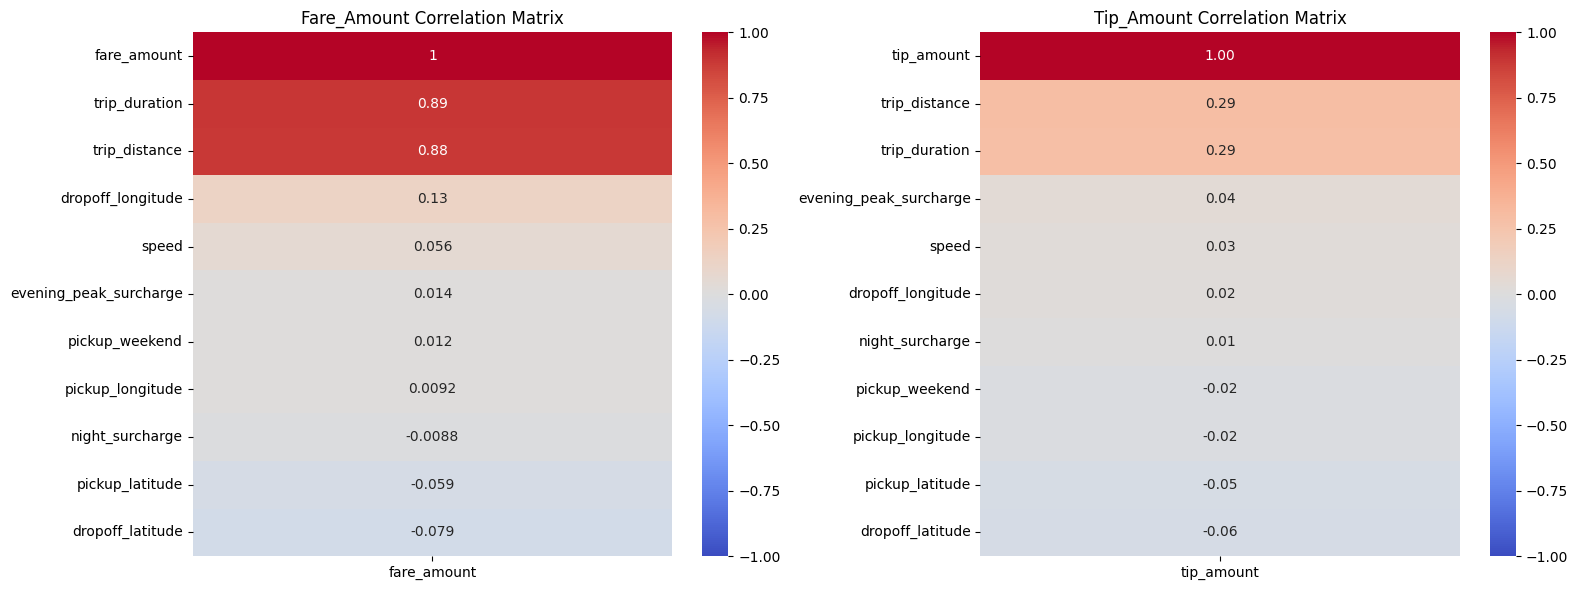

In [ ]:
numeric_cols = train.select_dtypes(include=['number'])

fare_corr_matrix = numeric_cols.drop(columns=['tip_amount']).corr()
tip_corr_matrix = numeric_cols.drop(columns=['fare_amount']).corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(fare_corr_matrix[['fare_amount']].sort_values(by='fare_amount', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Fare_Amount Correlation Matrix")
sns.heatmap(tip_corr_matrix[['tip_amount']].sort_values(by='tip_amount', ascending=False),
            annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title("Tip_Amount Correlation Matrix")

plt.tight_layout()
plt.show()

### Models (Full Train Dataset)

After careful consideration, I decided to use only a 30% subset of the training data in the next section. Training on the full dataset took approximately 6-8 hours per model, which is computationally intensive and time-consuming. Moreover, the performance improvement compared to using the subset was not significant enough to justify the added time and resource cost.

In [ ]:
X_train = train.drop(columns=['fare_amount', 'tip_amount','pickup_datetime', 'dropoff_datetime'])
y_fare_train = train['fare_amount']
y_tip_train =  train['tip_amount']

X_test = test.drop(columns=['fare_amount', 'tip_amount','pickup_datetime', 'dropoff_datetime'])
y_fare_test = test['fare_amount']
y_tip_test = test['tip_amount']

# print(X_test.shape, y_fare_test.shape, y_tip_test.shape)

##### Random Forest

###### Fare Amount RMSE

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_dist,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=3,
    n_jobs=1,
    return_train_score=True
)

grid_search.fit(X_train, y_fare_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
best_rmse = -grid_search.best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=5, n_estimators=50;, score=(train=-1.217, test=-1.264) total time= 1.9min
[CV 2/3] END max_depth=5, n_estimators=50;, score=(train=-1.251, test=-1.217) total time= 1.9min
[CV 3/3] END max_depth=5, n_estimators=50;, score=(train=-1.213, test=-1.325) total time= 1.8min
[CV 1/3] END max_depth=5, n_estimators=100;, score=(train=-1.216, test=-1.265) total time= 3.6min
[CV 2/3] END max_depth=5, n_estimators=100;, score=(train=-1.253, test=-1.218) total time= 3.6min
[CV 3/3] END max_depth=5, n_estimators=100;, score=(train=-1.210, test=-1.321) total time= 3.6min
[CV 1/3] END max_depth=5, n_estimators=150;, score=(train=-1.217, test=-1.266) total time= 5.3min
[CV 2/3] END max_depth=5, n_estimators=150;, score=(train=-1.253, test=-1.217) total time= 5.3min
[CV 3/3] END max_depth=5, n_estimators=150;, score=(train=-1.211, test=-1.322) total time= 5.4min
[CV 1/3] END max_depth=10, n_estimators=50;, score=(train=-0.

In [ ]:
y_test_pred = best_rf.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_fare_test, y_test_pred))
print("RMSE Fare :", rmse_test)

RMSE Fare : 1.0088353996445245


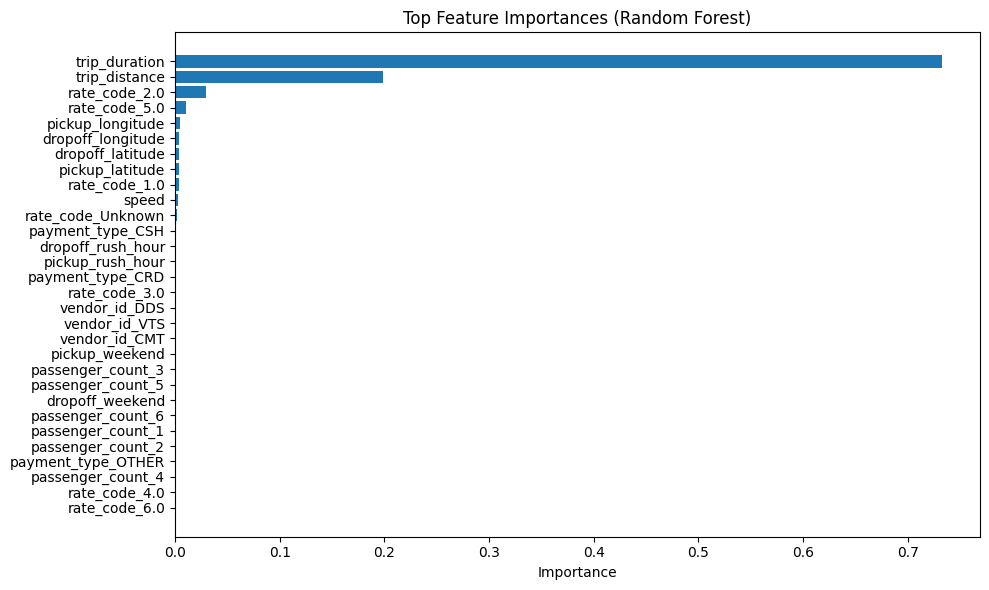

In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Top Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

###### Tip Amount RMSE

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_dist,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=3,
    n_jobs=1,
    return_train_score=True
)

grid_search.fit(X_train, y_tip_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
best_rmse = -grid_search.best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END max_depth=5, n_estimators=50;, score=(train=-0.724, test=-0.654) total time= 1.6min
[CV 2/3] END max_depth=5, n_estimators=50;, score=(train=-0.682, test=-0.738) total time= 1.7min
[CV 3/3] END max_depth=5, n_estimators=50;, score=(train=-0.693, test=-0.716) total time= 1.7min
[CV 1/3] END max_depth=5, n_estimators=100;, score=(train=-0.724, test=-0.654) total time= 3.4min
[CV 2/3] END max_depth=5, n_estimators=100;, score=(train=-0.682, test=-0.738) total time= 3.3min
[CV 3/3] END max_depth=5, n_estimators=100;, score=(train=-0.693, test=-0.716) total time= 3.3min
[CV 1/3] END max_depth=5, n_estimators=150;, score=(train=-0.724, test=-0.654) total time= 4.9min
[CV 2/3] END max_depth=5, n_estimators=150;, score=(train=-0.682, test=-0.738) total time= 5.0min
[CV 3/3] END max_depth=5, n_estimators=150;, score=(train=-0.693, test=-0.716) total time= 5.0min
[CV 1/3] END max_depth=10, n_estimators=50;, score=(train=-0.

In [ ]:
y_test_pred = best_rf.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_tip_test, y_test_pred))
print("RMSE Tip:", rmse_test)

RMSE Tip: 0.582951440498541


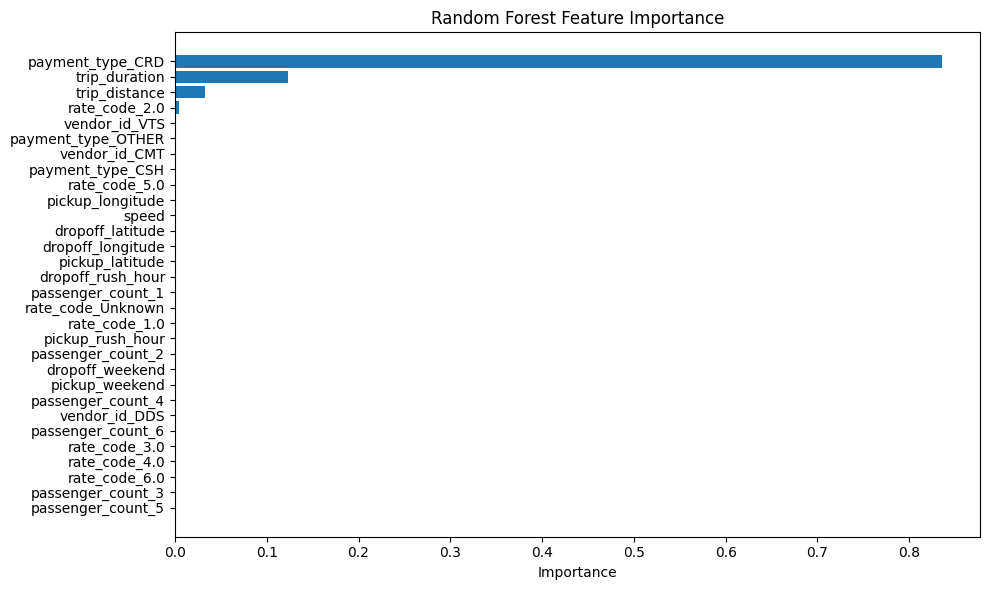

In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

##### AdaBoostRegressor

Fare Amount RMSE

In [ ]:
base= DecisionTreeRegressor(random_state=42)
ada = AdaBoostRegressor(estimator=base, random_state=42)

param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.3, 1.0],
    'estimator__max_depth': [10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist,
    n_iter=16,
    verbose=3,
    return_train_score=True,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42
)

random_search.fit(X_train, y_fare_train)

best_ada = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
best_rmse = -random_search.best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END estimator__max_depth=15, estimator__min_samples_leaf=2, estimator__min_samples_split=10, learning_rate=0.3, n_estimators=100;, score=(train=-0.508, test=-1.247) total time=13.8min
[CV 2/3] END estimator__max_depth=15, estimator__min_samples_leaf=2, estimator__min_samples_split=10, learning_rate=0.3, n_estimators=100;, score=(train=-0.515, test=-0.980) total time=13.8min
[CV 3/3] END estimator__max_depth=15, estimator__min_samples_leaf=2, estimator__min_samples_split=10, learning_rate=0.3, n_estimators=100;, score=(train=-0.509, test=-1.334) total time=13.9min
[CV 1/3] END estimator__max_depth=10, estimator__min_samples_leaf=1, estimator__min_samples_split=10, learning_rate=0.1, n_estimators=100;, score=(train=-0.703, test=-1.494) total time=10.9min
[CV 2/3] END estimator__max_depth=10, estimator__min_samples_leaf=1, estimator__min_samples_split=10, learning_rate=0.1, n_estimators=100;, score=(train=-0.700, test=-

In [ ]:
y_test_pred = best_ada.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_pred, y_fare_test))
print(f"Test RMSE: {rmse}")

Test RMSE: 1.005824960181773


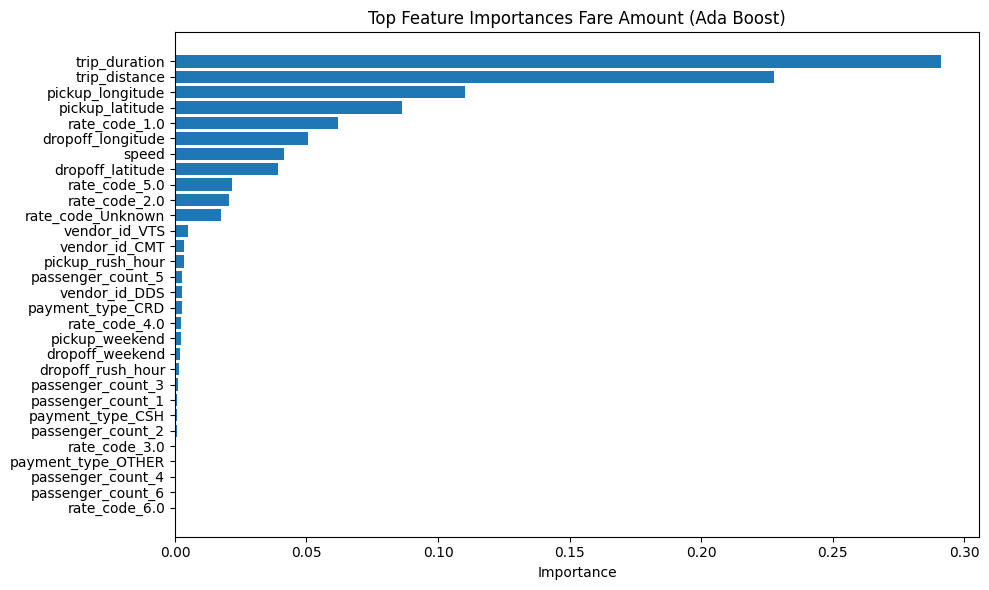

In [ ]:
importances = best_ada.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Top Feature Importances Fare Amount (Ada Boost)')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

Tip Amount RMSE

In [ ]:
base= DecisionTreeRegressor(random_state=42)
ada = AdaBoostRegressor(estimator=base, random_state=42)

param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.3, 1.0],
    'estimator__max_depth': [10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist,
    n_iter=16,
    verbose=3,
    return_train_score=True,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42
)

random_search.fit(X_train, y_tip_train)

best_ada = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
best_rmse = -random_search.best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

In [ ]:
y_test_pred = best_ada.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_pred, y_tip_test))
print(f"Test RMSE: {rmse}")

In [ ]:
importances = best_ada.feature_importances_
feature_names = X_fare_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Top Feature Importances Tip Amount (ADA Boost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=16,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=3,
    return_train_score=True,
)

random_search.fit(X_train, y_fare_train)
best_gbr = random_search.best_estimator_

# Predict and evaluate
y_pred = best_gbr.predict(X_test)
rmse = mean_squared_error(y_fare_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)
print("Test RMSE:", rmse)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END learning_rate=0.05, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=-0.667, test=-0.933) total time= 6.6min
[CV 2/3] END learning_rate=0.05, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=-0.674, test=-0.874) total time= 6.6min
[CV 3/3] END learning_rate=0.05, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=-0.669, test=-1.024) total time= 6.6min
[CV 1/3] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.8;, score=(train=-0.866, test=-0.943) total time= 1.9min
[CV 2/3] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.8;, score=(train=-0.906, test=-0.845) total time= 1.9min
[CV 3/3] END learning_rate=0.05, max_depth=3, min_samples_leaf=1

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
y_pred = best_gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_pred, y_fare_test))

print("Best Parameters:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)
print("Test RMSE:", rmse)

Best Parameters: {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best CV RMSE: 0.9201951073292505
Test RMSE: 0.8961043597849581


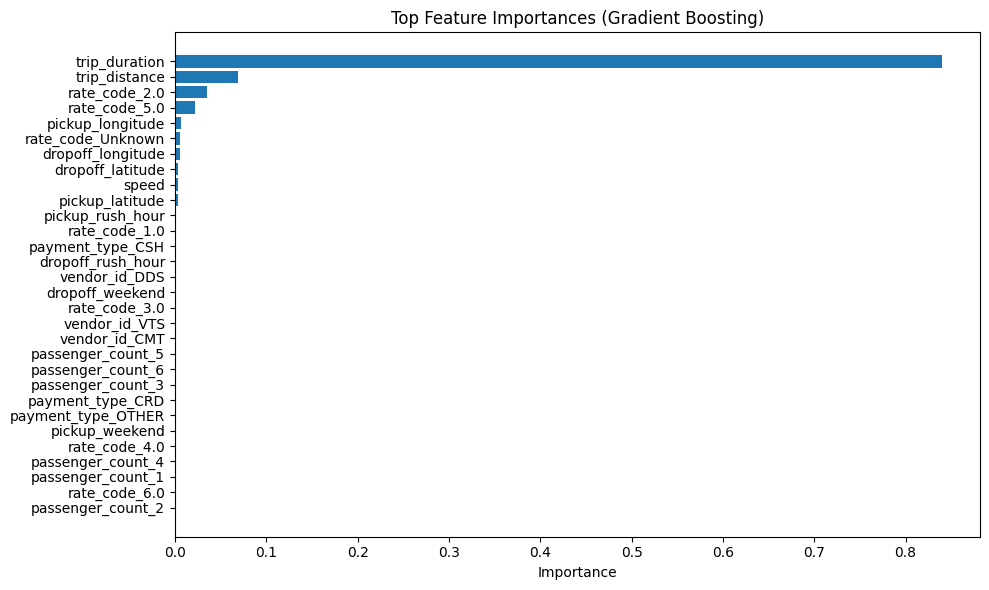

In [ ]:
importances = best_gbr.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Top Feature Importances (Gradient Boosting)')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=16,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=3,
    return_train_score=True,
)

random_search.fit(X_tip_train, y_tip_train)
best_gbr = random_search.best_estimator_

# Predict and evaluate
y_pred = best_gbr.predict(X_test)
rmse = mean_squared_error(y_tip_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)
print("Test RMSE:", rmse)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END learning_rate=0.05, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=-0.489, test=-0.611) total time= 6.0min
[CV 2/3] END learning_rate=0.05, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=-0.483, test=-0.665) total time= 6.1min
[CV 3/3] END learning_rate=0.05, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8;, score=(train=-0.487, test=-0.642) total time= 6.0min
[CV 1/3] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.8;, score=(train=-0.636, test=-0.591) total time= 1.8min
[CV 2/3] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.8;, score=(train=-0.605, test=-0.655) total time= 1.8min
[CV 3/3] END learning_rate=0.05, max_depth=3, min_samples_leaf=1

In [ ]:
importances = best_gbr.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Top Feature Importances (Gradient Boosting)')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()

### Models (Subset Data)

Since training full dataset would be costly in terms of time I tried to use subset data of 10% of data since by trial the result doesnt differs much

In [ ]:
train_subset = train.sample(frac=0.3, random_state=42)

X_train_subset = train_subset.drop(columns=['fare_amount', 'tip_amount','pickup_datetime', 'dropoff_datetime'])
y_fare_train_subset = train_subset['fare_amount']
y_tip_train_subset =  train_subset['tip_amount']
print(X_train_subset.shape, y_fare_train_subset.shape, y_tip_train_subset.shape)

(243928, 29) (243928,) (243928,)


Defining n_iter :

$$
P = 1 - \left(1 - \frac{k}{N} \right)^x
$$

$$
x = \frac{\log(1 - P)}{\log\left(1 - \frac{k}{N} \right)}
$$

| Symbol | Meaning |
|--------|---------|
| N  | Total number of candidates in our search space. |
| k| Number of acceptable top results. |
| x | Number of random samples needed. |
| P | Probability (between 0 and 1) of successfully selecting at least one top-\( k \) result in \( x \) samples. |

In [ ]:
import math
def required_samples(N, k, P):
    if not (0 < P < 1):
        raise ValueError("P must be between 0 and 1 (exclusive).")
    if k >= N:
        return 1

    x = math.log(1 - P) / math.log(1 - k / N)
    return math.ceil(x)

# Example usage:
N = 96
k = 10
P = 0.9

x = required_samples(N, k, P)
print(x)

##### Random Forest

##### Fare Amount

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

random_search  = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=3,
    n_iter=18,
    n_jobs=1,
    return_train_score=True
)

random_search .fit(X_train_subset, y_fare_train_subset)

best_rf_fare = random_search .best_estimator_

print("Best Parameters:", random_search .best_params_)
best_rmse = -random_search .best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-1.179, test=-1.258) total time=  22.4s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-1.184, test=-1.242) total time=  22.4s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-1.188, test=-1.230) total time=  22.0s
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=-0.861, test=-1.046) total time=  41.6s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=-0.891, test=-1.060) total time=  41.6s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=-0.885, test=-1.024) total time=  41.7s
[CV 1/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=-0.536, t

In [ ]:
y_test_pred = best_rf_fare.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_fare_test, y_test_pred))
print("r2 :", r2_score(y_fare_test, y_test_pred))
print("RMSE Fare :", rmse_test)

r2 : 0.930905920194869
RMSE Fare : 1.0451619248298636


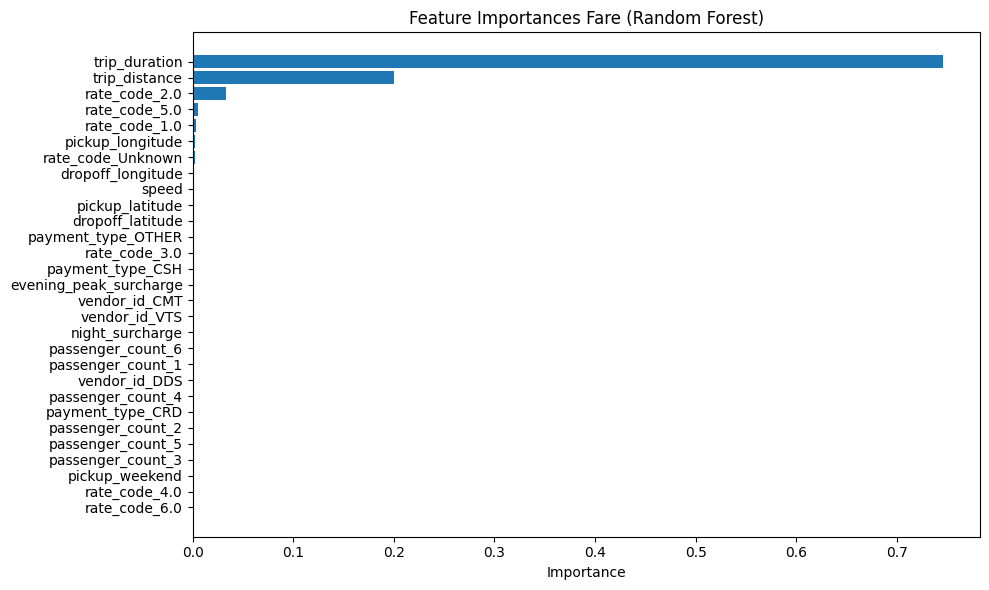

In [ ]:
importances = best_rf_fare.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances Fare (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### Tip Amount

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

random_search  = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=3,
    n_iter=18,
    n_jobs=1,
    return_train_score=True
)

random_search .fit(X_train_subset, y_tip_train_subset)

best_rf_tip = random_search .best_estimator_

print("Best Parameters:", random_search .best_params_)
best_rmse = -random_search .best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=-0.615, test=-0.778) total time= 1.1min
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=-0.683, test=-0.647) total time= 1.1min
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=-0.691, test=-0.630) total time= 1.1min
[CV 1/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=(train=-0.480, test=-0.778) total time= 2.3min
[CV 2/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=(train=-0.549, test=-0.653) total time= 2.3min
[CV 3/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=(train=-0.565, test=-0.619) total time= 2.3min
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-0

In [ ]:
y_test_pred = best_rf_tip.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_tip_test, y_test_pred))
print("r2 :", r2_score(y_tip_test, y_test_pred))
print("RMSE Fare :", rmse_test)

r2 : 0.7359001668224752
RMSE Fare : 0.5831139253453438


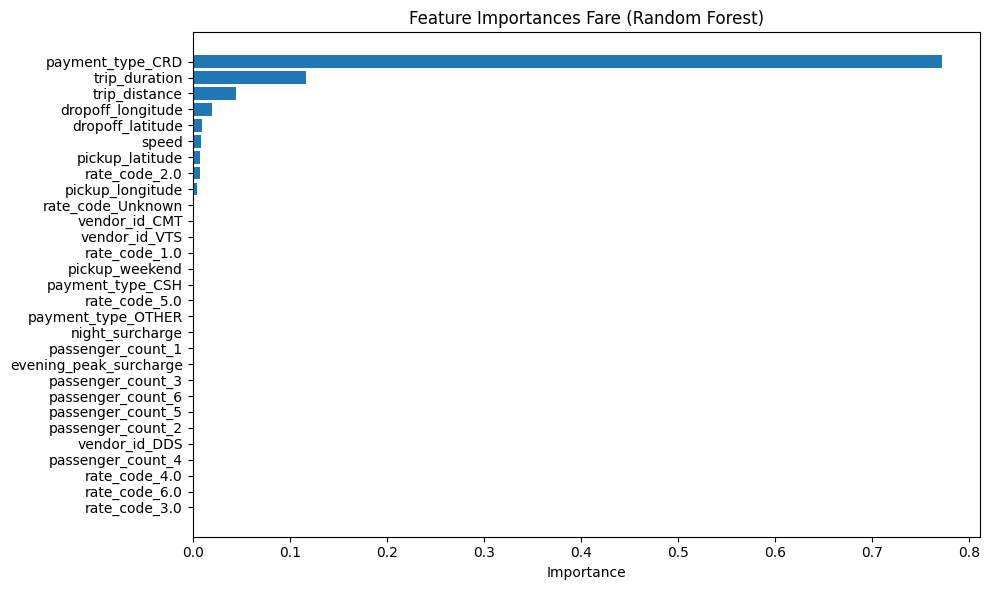

In [ ]:
importances = best_rf_tip.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances Fare (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### AdaBoostRegressor

##### Fare Amount

In [ ]:
base= DecisionTreeRegressor(random_state=42)
ada = AdaBoostRegressor(estimator=base, random_state=42)

param_dist = {
    'n_estimators': [50,100],
    'learning_rate': [0.01, 0.1, 0.3],
    'estimator__max_depth': [10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [2, 4]
}

random_search = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist,
    n_iter=16,
    verbose=3,
    return_train_score=True,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42
)

random_search.fit(X_train_subset, y_fare_train_subset)

best_ada_fare = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
best_rmse = -random_search.best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END estimator__max_depth=10, estimator__min_samples_leaf=2, estimator__min_samples_split=2, learning_rate=0.3, n_estimators=50;, score=(train=-0.636, test=-1.159) total time= 1.1min
[CV 2/3] END estimator__max_depth=10, estimator__min_samples_leaf=2, estimator__min_samples_split=2, learning_rate=0.3, n_estimators=50;, score=(train=-0.657, test=-1.117) total time= 1.1min
[CV 3/3] END estimator__max_depth=10, estimator__min_samples_leaf=2, estimator__min_samples_split=2, learning_rate=0.3, n_estimators=50;, score=(train=-0.643, test=-1.102) total time= 1.1min
[CV 1/3] END estimator__max_depth=15, estimator__min_samples_leaf=4, estimator__min_samples_split=5, learning_rate=0.1, n_estimators=50;, score=(train=-0.429, test=-1.158) total time= 1.5min
[CV 2/3] END estimator__max_depth=15, estimator__min_samples_leaf=4, estimator__min_samples_split=5, learning_rate=0.1, n_estimators=50;, score=(train=-0.432, test=-1.122) tot

In [ ]:
y_test_pred = best_ada_fare.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_fare_test, y_test_pred))
print("r2 :", r2_score(y_fare_test, y_test_pred))
print("RMSE Fare :", rmse_test)

r2 : 0.9273670432344101
RMSE Fare : 1.0715933833460736


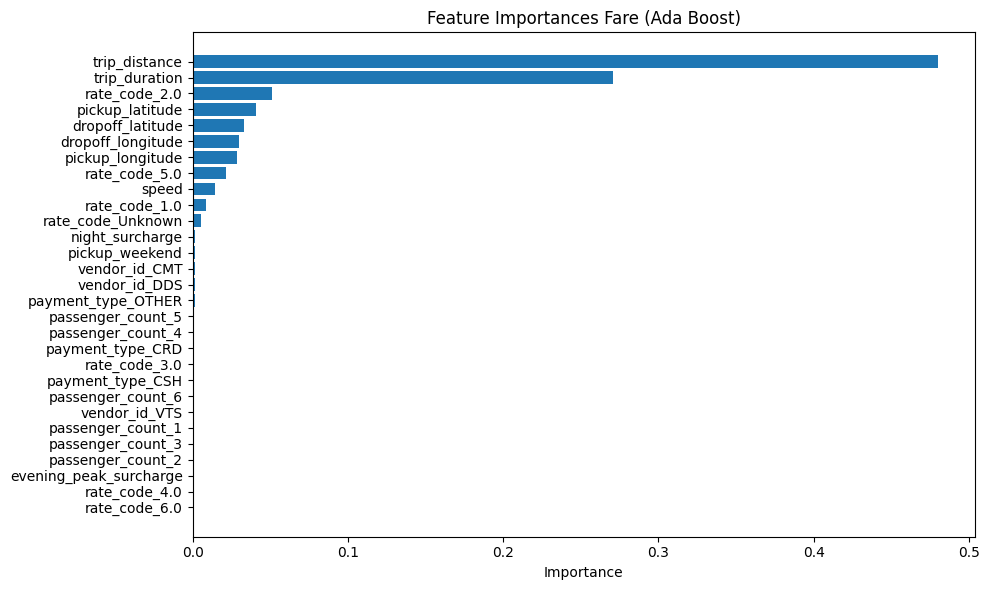

In [ ]:
importances = best_ada_fare.feature_importances_
feature_names = X_train_subset.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances Fare (Ada Boost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
base= DecisionTreeRegressor(random_state=42)
ada = AdaBoostRegressor(estimator=base, random_state=42)

param_dist = {
    'n_estimators': [50,100],
    'learning_rate': [0.01, 0.1, 0.3],
    'estimator__max_depth': [10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [2, 4]
}

random_search = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist,
    n_iter=16,
    verbose=3,
    return_train_score=True,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42
)

random_search.fit(X_train_subset, y_tip_train_subset)

best_ada_tip = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
best_rmse = -random_search.best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END estimator__max_depth=10, estimator__min_samples_leaf=2, estimator__min_samples_split=2, learning_rate=0.3, n_estimators=50;, score=(train=-0.253, test=-0.607) total time= 1.0min
[CV 2/3] END estimator__max_depth=10, estimator__min_samples_leaf=2, estimator__min_samples_split=2, learning_rate=0.3, n_estimators=50;, score=(train=-0.251, test=-0.448) total time=  59.4s
[CV 3/3] END estimator__max_depth=10, estimator__min_samples_leaf=2, estimator__min_samples_split=2, learning_rate=0.3, n_estimators=50;, score=(train=-0.255, test=-0.778) total time= 1.0min
[CV 1/3] END estimator__max_depth=15, estimator__min_samples_leaf=4, estimator__min_samples_split=5, learning_rate=0.1, n_estimators=50;, score=(train=-0.209, test=-0.603) total time= 1.3min
[CV 2/3] END estimator__max_depth=15, estimator__min_samples_leaf=4, estimator__min_samples_split=5, learning_rate=0.1, n_estimators=50;, score=(train=-0.213, test=-0.440) tot

In [ ]:
y_test_pred = best_ada_tip.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_tip_test, y_test_pred))
print("r2 :", r2_score(y_tip_test, y_test_pred))
print("RMSE Fare :", rmse_test)

r2 : 0.7406326568371531
RMSE Fare : 0.5778658052121817


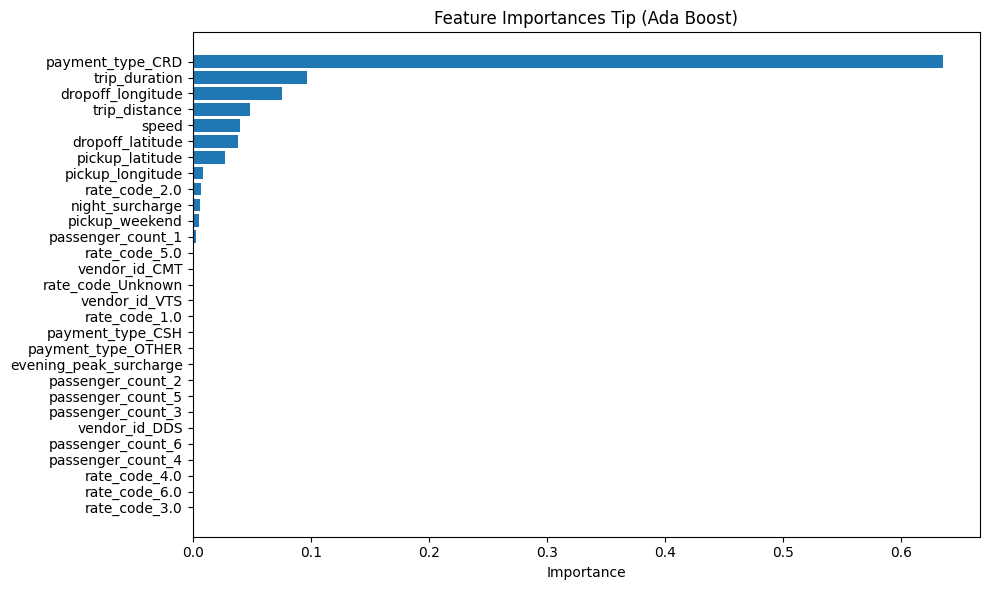

In [ ]:
importances = best_ada_tip.feature_importances_
feature_names = X_train_subset.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances Tip (Ada Boost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'subsample': [0.6, 0.8]
}
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=21,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=3,
    return_train_score=True,
)

random_search.fit(X_train_subset, y_fare_train_subset)
best_gbr_fare = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
best_rmse = -random_search.best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.6;, score=(train=-0.873, test=-1.020) total time=  48.7s
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.6;, score=(train=-0.920, test=-1.002) total time=  48.4s
[CV 3/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.6;, score=(train=-0.888, test=-1.007) total time=  51.7s
[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150, subsample=0.8;, score=(train=-0.836, test=-1.021) total time= 1.5min
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150, subsample=0.8;, score=(train=-0.856, test=-1.002) total time= 1.5min
[CV 3/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_sa

In [ ]:
y_test_pred = best_gbr_fare.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_fare_test, y_test_pred))
print("r2 :", r2_score(y_fare_test, y_test_pred))
print("RMSE Fare :", rmse_test)

r2 : 0.9349070380407268
RMSE Fare : 1.0144489065212279


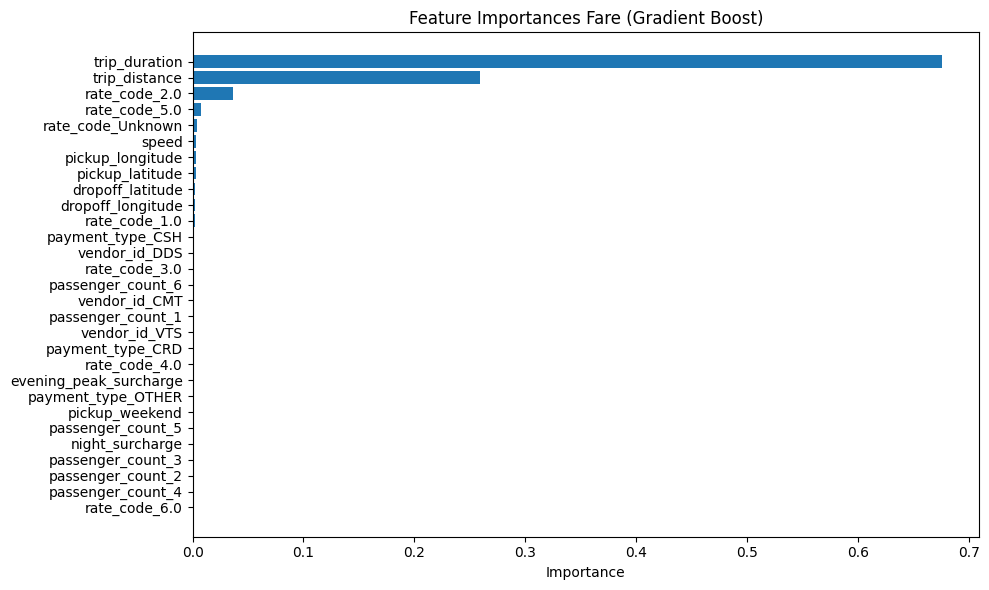

In [ ]:
importances = best_gbr_fare.feature_importances_
feature_names = X_train_subset.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances Fare (Gradient Boost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'subsample': [0.6, 0.8]
}
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=21,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=3,
    return_train_score=True,
)

random_search.fit(X_train_subset, y_tip_train_subset)
best_gbr_tip= random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
best_rmse = -random_search.best_score_
print("Best RMSE (CV):", best_rmse)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.6;, score=(train=-0.599, test=-0.772) total time=  48.1s
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.6;, score=(train=-0.635, test=-0.647) total time=  47.5s
[CV 3/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.6;, score=(train=-0.657, test=-0.634) total time=  47.3s
[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150, subsample=0.8;, score=(train=-0.586, test=-0.772) total time= 1.5min
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150, subsample=0.8;, score=(train=-0.599, test=-0.646) total time= 1.5min
[CV 3/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_sa

In [ ]:
y_test_pred = best_gbr_tip.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_tip_test, y_test_pred))
print("r2 :", r2_score(y_tip_test, y_test_pred))
print("RMSE tip :", rmse_test)

r2 : 0.740812269463015
RMSE tip : 0.5776656836997897


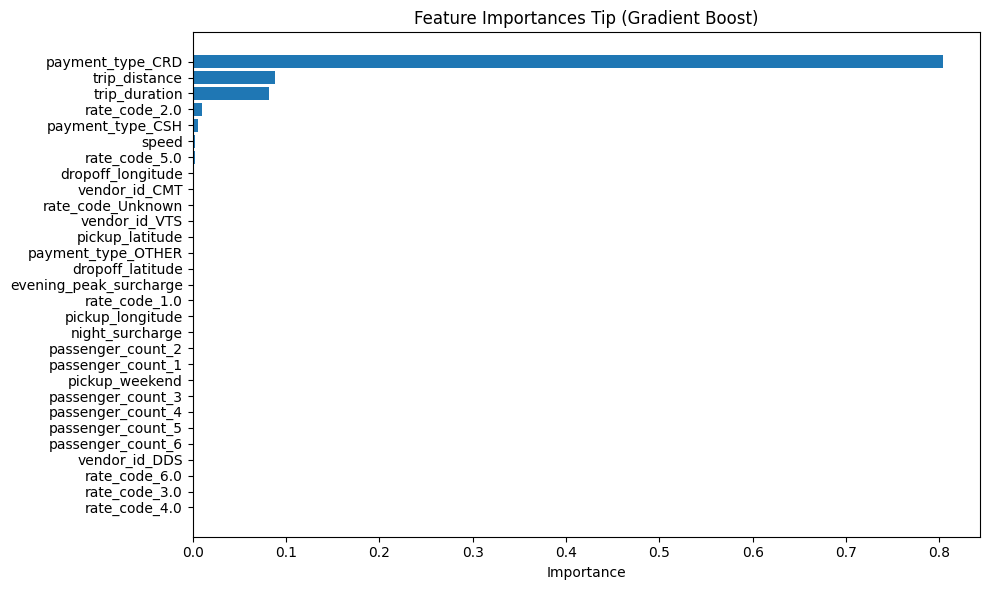

In [ ]:
importances = best_gbr_tip.feature_importances_
feature_names = X_train_subset.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances Tip (Gradient Boost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Findings :
* For fare prediction, all models consistently identified trip duration or trip distance as the most important features. Which makes sense because in most taxi fare structures, the fare is directly influenced by how far or how long the passenger travels.

*  For tip prediction, all models highlighted payment type (CRD) as the most influential feature.

Hyperparameter :
* **n_estimators** :  <br>
Adding more trees helps the model make more stable and reliable predictions by reducing randomness. But, it also means longer training time and higher memory use. I picked 50, 100, and 150 to find a good balance just enough trees to perform well without overloading the system.

* **max_depth** :  <br>
This controls how deep each tree can grow. If the tree is too shallow, it might miss important patterns in the data. But if it’s too deep, the model can end up memorizing the training set instead of learning general trends.

* **min_samples_split** : <br>
This sets the minimum number of samples needed to split a node. If the value is too small, the tree might split too much and overfit by chasing tiny patterns. Tuning this helps control how complex the tree becomes and improves generalization.

* **min_samples_leaf** : <br>
This controls the minimum number of samples required at a leaf node.

Making Taxi-test Prediction

In [ ]:
X_test = test_data.drop(columns=['fare_amount', 'tip_amount','pickup_datetime', 'dropoff_datetime'])
y_fare_test = test_data['fare_amount']
y_tip_test = test_data['tip_amount']

y_fare_pred = best_gbr_fare.predict(X_test)
y_tip_pred = best_gbr_tip.predict(X_test)

predictions_df = pd.DataFrame({
    'predicted_fare_amount': y_fare_pred,
    'predicted_tip_amount': y_tip_pred})

predictions_df.to_csv('taxi_predictions.csv', index=False)

### References

- Rate Code : https://www.nyc.gov/assets/tlc/downloads/pdf/taxi_information.pdf
- US Timezones : https://www.timeanddate.com/time/zones/est
- AdaBoostRegressor : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html